In [8]:
import dask.dataframe as dd
import pandas as pd
from datetime import datetime, timedelta
exec(open("./lib/splitter.py").read())

In [80]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [83]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles, 6371 for kilometers
    return c * r

def haversineMeters(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles, 6371 for kilometers
    return c * r * 1000

def fastMeterDistance(lat1, lon1, lat2, lon2):
    return sqrt((lon2 - lon1)**2 + (lat2 - lat1 )**2) * 100000

def superFastMeterDistance(lat1, lon1, lat2, lon2):
    return (abs((lon2 - lon1)) + abs((lat2 - lat1))) * 100000


def getMeterDistance(lat1, lon1, lat2, lon2):
#     return haversineMeters(lat1, lon1, lat2, lon2)
    return fastMeterDistance(lat1, lon1, lat2, lon2)
    

def isLessThan50Meter(lat1, lon1, lat2, lon2):
    pass
    

In [53]:
date = datetime.strptime('2000-01-01', "%Y-%m-%d")
inputFile = './data/splitted/out_2019-12-19.csv'
df = pd.read_csv(inputFile)

In [54]:
df.head()

,pid,hid,lat,lon,ts,td,dw,tz
0,Santa Clara County,8b36e7aa0781e013ba4f656aaac11c87c6d63816,36.909643,-121.559312,1576782347,11:05:47,Thu,America/Los_Angeles
1,Santa Clara County,863934991c5d1389bd16132567a286148108f3d0,36.912950,-121.555730,1576771243,08:00:43,Thu,America/Los_Angeles
2,Santa Clara County,863934991c5d1389bd16132567a286148108f3d0,36.912956,-121.555730,1576771243,08:00:43,Thu,America/Los_Angeles
3,Santa Clara County,863934991c5d1389bd16132567a286148108f3d0,36.912956,-121.555730,1576742443,00:00:43,Thu,America/Los_Angeles
4,Santa Clara County,e707a9304de98308883ecac832ea47917f395cd5,36.903164,-121.560289,1576773332,08:35:32,Thu,America/Los_Angeles


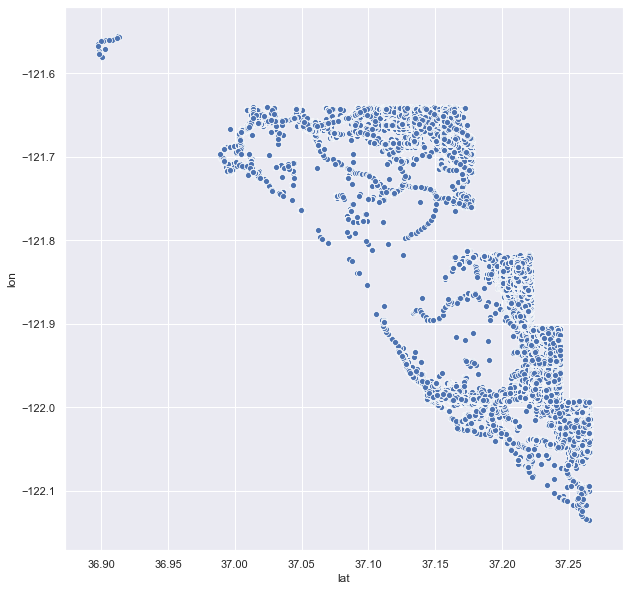

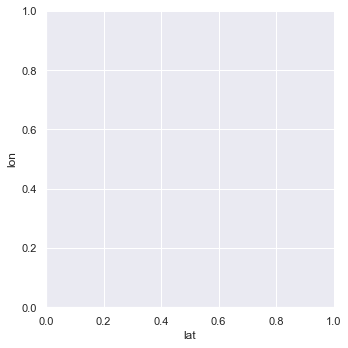

In [55]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.relplot(x="lat", y="lon", ax=ax, data=df);

In [77]:
haversine(36.9,-121.6, 37.25, -122.1)

59.01070547712714

In [75]:
haversineMeters(36.9001, -121.6, 36.9, -121.6)

11.119492664568353

In [76]:
fastMeterDistance( 36.9001, -121.6, 36.9, -121.6)

10.000000000331966

In [85]:
superFastMeterDistance(-121.6, 36.9, -122.1, 37.25)

85000.00000000015

In [61]:
fastMeterDistance(-121.6, 36.9, -122.1, 37.25)

61032.77807866859

In [60]:
haversineMeters(-121.6, 36.9, -122.1, 37.25)

59269.077383912365